In [1]:
# 导入包：
import sys
sys.path.append('/home/dengruijun/data/FinTech/PP-Split/')

from target_model.data_preprocessing.preprocess_cifar10 import get_cifar10_normalize,deprocess,get_cifar10_fisher_normalize
from target_model.data_preprocessing.preprocess_mnist import get_mnist_normalize
from target_model.data_preprocessing.preprocess_utkface import get_utkface_normalize


/home/dengruijun/miniconda3/envs/drj-pytorch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 样式设置
# plt.style.use(['science','no-latex','ieee'])
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, StrMethodFormatter, MaxNLocator


# 样式设置
# plt.style.use(['science','no-latex','ieee'])

plt.rcParams.update({
#     'font.family': 'Times New Roman',
    'font.size': 22,
    'axes.labelsize': 30,
    'axes.titlesize': 24,
    'axes.linewidth': 1,
    'xtick.labelsize': 30,
    'ytick.labelsize': 30,
    'xtick.major.size': 15,
    'ytick.major.size': 15,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'legend.fontsize': 18,
    'lines.linewidth': 2,
    'lines.markersize': 16,
    'axes.grid': True,
    'grid.alpha': 0.53,
    'grid.linestyle': '--',
    'axes.spines.top': True,  # 修改此行
    'axes.spines.right': True  # 修改此行
})
# palette = sns.color_palette("colorblind")

# 创建 ScalarFormatter 对象
formatter_sci = ScalarFormatter(useMathText=True)
formatter_sci.set_powerlimits((-2, 2))  # 设置指数范围
formatter_str = StrMethodFormatter("{x:.2f}")



In [3]:
mnist_train_loader, mnist_test_loader = get_mnist_normalize(batch_size=1,test_bs=1)
cifar10_train_loader, cifar10_test_loader = get_cifar10_normalize(batch_size=1,test_bs=1)
mnist_one_image = next(iter(mnist_train_loader))[0]
cifar10_one_image = next(iter(cifar10_train_loader))[0]
# print(one_image.shape)

In [39]:
# print(one_image[0])

# 1. 画分布+累计分布函数

images_pooled:  torch.Size([1, 14, 14])
data.size(): 784


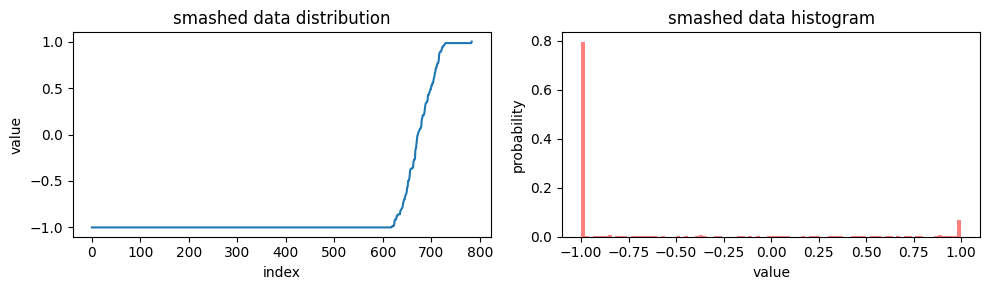

sigma(prob): 0.9999999999999996
counts[0],counts[-1],counts[49] 0.7946429747608035 0.07015307160809661 0.0025510184099256684


In [4]:
# 看分布
import numpy as np
import matplotlib.pyplot as plt

def plot_smashed_distribution_and_accumulated(smashed_data,start = -1, end = 1):
    data = smashed_data.flatten().numpy() # 拉平后的数据
    data_sort = np.sort(data) # 排序后的拉平数据
    data_size = np.size(data) # 数据的大小

    print("data.size():",data_size)
    counts, buckets = np.histogram(data, bins=1000 if 1000 < data_size else data_size, density=True) 
    # counts, buckets = np.histogram(data, bins=10, density=True) 

    # 画图 index-value 图1
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    x_axis = np.arange(0, len(data), 1)
    plt.plot(x_axis, data_sort)
    plt.title('smashed data distribution')
    plt.xlabel('index')
    plt.ylabel('value')

    # 画图 value-probability 图2
    plt.subplot(1,2,2)
    counts = counts/np.sum(counts) # 如果start和end不是[0，1]就都要用
    # edges = np.hstack((buckets,np.array([buckets[-1]+(buckets[1]-buckets[0])]))) # linespace
    edges = buckets # histogram
    plt.stairs(counts,edges,fill=True,color='red', alpha=0.5)
    plt.title('smashed data histogram')
    plt.xlabel('value')
    plt.ylabel('probability')

    plt.subplots_adjust(wspace=0.5)  # 调整水平间距
    plt.tight_layout()  # 自动调整子图布局
    plt.show()
    # plt.savefig(f'smashed_data_distribution{time.time()}.png')
    # 打印信息
    print("sigma(prob):",np.sum(counts)) # 查看counts的量
    print("counts[0],counts[-1],counts[49]",counts[0],counts[-1],counts[49]) # 查看counts的量

from torch.nn.functional import avg_pool2d
pooled_image = avg_pool2d(one_image[0],kernel_size=2)
print('images_pooled: ',pooled_image.shape)
plot_smashed_distribution(one_image[0])

# 2. 只画分布

images_pooled:  torch.Size([1, 14, 14])
data.size(): 784
sigma(prob): 1.0


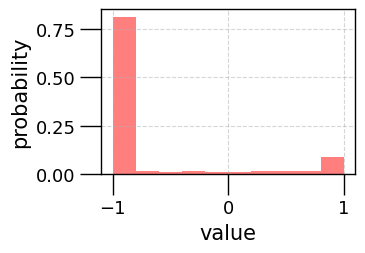

In [38]:
# 只画distribution
# 看分布
import numpy as np
import matplotlib.pyplot as plt

def plot_smashed_distribution(smashed_data,start = -1, end = 1):
    data = smashed_data.flatten().numpy() # 拉平后的数据
    data_sort = np.sort(data) # 排序后的拉平数据
    data_size = np.size(data) # 数据的大小

    print("data.size():",data_size)
    counts, buckets = np.histogram(data, bins=10 if 10 < data_size else data_size, density=True) 
    # counts, buckets = np.histogram(data, bins=10, density=True) 

    # 画图 index-value 图1
    plt.figure(figsize=(4,6))

    # 画图 value-probability 图2
    counts = counts/np.sum(counts) # 如果start和end不是[0，1]就都要用
    # edges = np.hstack((buckets,np.array([buckets[-1]+(buckets[1]-buckets[0])]))) # linespace
    edges = buckets # histogram
    plt.stairs(counts,edges,fill=True,color='red', alpha=0.5)
    # plt.title('smashed data histogram')
    # plt.xlabel('value')
    plt.ylabel('probability')

    plt.tight_layout()  # 自动调整子图布局
    # plt.show()
    # plt.savefig(f'smashed_data_distribution{time.time()}.png')
    # 打印信息
    print("sigma(prob):",np.sum(counts)) # 查看counts的量
    # print("counts[0],counts[-1],counts[49]",counts[0],counts[-1],counts[49]) # 查看counts的量

    # plt.savefig('data_intrinsic_CIFAR10-ref0.pdf', format='pdf',bbox_inches='tight')
    plt.savefig('data_intrinsic_MNIST-ref0.pdf', format='pdf',bbox_inches='tight')

from torch.nn.functional import avg_pool2d
pooled_image = avg_pool2d(one_image[0],kernel_size=2)
print('images_pooled: ',pooled_image.shape)
plot_smashed_distribution(one_image[0])

# 4. 各种数据集

## 4.1 utkface

In [3]:
train_loader, test_loader = get_utkface_normalize(batch_size=1,test_bs=1)

In [4]:
import torch
def check_image_shapes(dataloader):
    for batch_idx, (data, _, _) in enumerate(dataloader):
        if data[0].shape != torch.Size([3, 64, 64]):
            print(f"Image {batch_idx} has shape {data.shape}")

# 看图片的shape，输出异常图片的序号：(aligned and cropped)
print("train_loader:")
check_image_shapes(train_loader)
print("test_loader:")
check_image_shapes(test_loader)
print("done")

train_loader:
test_loader:
done



# ImageNet1k

In [5]:
from torchvision.datasets import ImageNet
from torchvision.models import ViT_B_16_Weights
from torchvision.models import resnet50, ResNet50_Weights

data_dir = '/home/dengruijun/data/project/data/imageNet1k'
transform = ViT_B_16_Weights.DEFAULT.transforms()

# weights = ResNet50_Weights.DEFAULT
# preprocess = weights.transforms()

dataset = ImageNet(data_dir, split='train', transform=transform)
dataloader = DataLoader(
    dataset,
    batch_size=1,
    num_workers=8,
    shuffle=True,
    drop_last=True,
    pin_memory=True,
)

image = next(iter(dataloader))
print(image.shape)

RuntimeError: The archive ILSVRC2012_devkit_t12.tar.gz is not present in the root directory or is corrupted. You need to download it externally and place it in /home/dengruijun/data/project/data/imageNet1k.